# Code embedding evaluation (100 repositories / validation set)

## 1. Loading repository information

In [1]:
!pip install gdown
!gdown 12njH7JojRSgK6yzfHmhdZSrnfVN9x9NQ

Downloading...
From: https://drive.google.com/uc?id=12njH7JojRSgK6yzfHmhdZSrnfVN9x9NQ
To: /content/repo_info_validation.pkl
100% 51.4M/51.4M [00:00<00:00, 190MB/s]


In [3]:
import pickle

with open("repo_info_validation.pkl", "rb") as f:
    repo_info = pickle.load(f)
    f.close()

## 2. Download pre-trained model

In [4]:
!pip3 install torch
!pip3 install transformers
!wget https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
# !curl -O https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.2 MB/s eta 0:00:00
--2023-07-09 17:00:22--  https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10352 (10K) [text/plain]
Saving to: ‘unixcoder.py’

unixcoder.py        100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-07-09 17:00:23 (30.9 MB/s) - ‘unixcoder.py’ saved [10352/10352]



In [5]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [6]:
unixcoder_model_names = [
    "Lazyhope/unixcoder-nine-advtest"
]

In [7]:
from unixcoder import UniXcoder
from transformers import AutoTokenizer, AutoModel

unixcoder_models = {}
# Initialise unixcoder model
for u_name in unixcoder_model_names:
    unixcoder_models[u_name] = UniXcoder(u_name)

## 3. Generating code embeddings

In [8]:
# Getting code embeddings by UniXcoder
def get_unixcoder_embeddings(code, model):
    tokens_ids = model.tokenize([code], max_length=512, mode="<encoder-only>")
    source_ids = torch.tensor(tokens_ids).to(device)
    _, embeddings = model(source_ids)
    embeddings = embeddings.to("cpu")
    del source_ids
    return embeddings

# Getting code list embeddings
def get_code_list_embeddings(data_list):
    codes_embeddings = {}
    # Using UniXcoder model
    for u_name, u_model in tqdm(unixcoder_models.items()):
        print(f" - Using {u_name} model - Running on", device)
        model = u_model.to(device)
        code_embeddings_list = torch.concat([get_unixcoder_embeddings(code, model) for code in data_list])
        codes_embeddings[u_name] = code_embeddings_list
        del model

    return codes_embeddings


# Getting embeddings
def get_embeddings(input_data=None, input_mode=None):
    if input_data is None or not input_data:
        return torch.zeros((768,), device=device)

    with torch.no_grad():
        if input_mode == "codes":
            return get_code_list_embeddings(input_data)


In [9]:
from tqdm import tqdm

for repo_name, repo_dict in tqdm(repo_info.items()):
    print(f" - Generating code embeddings for {repo_name} - ")
    repo_dict["codes_embeddings"] = get_embeddings(input_data=repo_dict["codes"], input_mode="codes")

  0%|          | 0/100 [00:00<?, ?it/s]

 - Generating code embeddings for pyparsing/pyparsing - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  1%|          | 1/100 [00:13<22:49, 13.84s/it]

 - Generating code embeddings for JohnLangford/vowpal_wabbit - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  2%|▏         | 2/100 [00:20<15:52,  9.72s/it]

 - Generating code embeddings for django/channels - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  3%|▎         | 3/100 [00:21<09:29,  5.87s/it]

 - Generating code embeddings for gak/pycallgraph - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  4%|▍         | 4/100 [00:24<07:07,  4.45s/it]

 - Generating code embeddings for Microsoft/PTVS - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  5%|▌         | 5/100 [00:37<12:04,  7.63s/it]

 - Generating code embeddings for fabtools/fabtools - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  6%|▌         | 6/100 [00:45<12:14,  7.81s/it]

 - Generating code embeddings for indico/indico - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  7%|▋         | 7/100 [01:58<45:08, 29.12s/it]

 - Generating code embeddings for ray-project/ray - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  8%|▊         | 8/100 [05:53<2:25:14, 94.72s/it]

 - Generating code embeddings for PyMySQL/PyMySQL - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  9%|▉         | 9/100 [05:56<1:40:07, 66.02s/it]

 - Generating code embeddings for fxsjy/jieba - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 10%|█         | 10/100 [05:57<1:08:53, 45.92s/it]

 - Generating code embeddings for tartiflette/tartiflette-asgi - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 11%|█         | 11/100 [05:58<47:28, 32.00s/it]  

 - Generating code embeddings for nose-devs/nose2 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 12%|█▏        | 12/100 [06:08<37:18, 25.43s/it]

 - Generating code embeddings for lepture/mistune - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 13%|█▎        | 13/100 [06:11<27:05, 18.69s/it]

 - Generating code embeddings for worldveil/dejavu - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 14%|█▍        | 14/100 [06:13<19:18, 13.47s/it]

 - Generating code embeddings for willmcgugan/rich - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 15%|█▌        | 15/100 [06:27<19:28, 13.75s/it]

 - Generating code embeddings for PetrochukM/PyTorch-NLP - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 16%|█▌        | 16/100 [06:32<15:28, 11.05s/it]

 - Generating code embeddings for ionelmc/python-hunter - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 17%|█▋        | 17/100 [06:36<12:36,  9.11s/it]

 - Generating code embeddings for WhyNotHugo/python-barcode - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 18%|█▊        | 18/100 [06:38<09:20,  6.83s/it]

 - Generating code embeddings for davedoesdev/python-jwt - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 19%|█▉        | 19/100 [06:39<06:43,  4.98s/it]

 - Generating code embeddings for chriskiehl/Gooey - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 20%|██        | 20/100 [06:48<08:20,  6.26s/it]

 - Generating code embeddings for jpadilla/pyjwt - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 21%|██        | 21/100 [06:52<07:26,  5.65s/it]

 - Generating code embeddings for mindsdb/mindsdb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 22%|██▏       | 22/100 [07:23<17:13, 13.25s/it]

 - Generating code embeddings for facebookresearch/hydra - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 23%|██▎       | 23/100 [07:39<18:00, 14.03s/it]

 - Generating code embeddings for Instagram/MonkeyType - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 24%|██▍       | 24/100 [07:44<14:18, 11.29s/it]

 - Generating code embeddings for frewsxcv/python-geojson - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 25%|██▌       | 25/100 [07:45<10:25,  8.35s/it]

 - Generating code embeddings for zostera/django-bootstrap4 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 26%|██▌       | 26/100 [07:48<08:06,  6.58s/it]

 - Generating code embeddings for google/pytype - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 27%|██▋       | 27/100 [09:30<42:46, 35.16s/it]

 - Generating code embeddings for pricingassistant/mrq - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 28%|██▊       | 28/100 [09:33<30:39, 25.54s/it]

 - Generating code embeddings for tylerlaberge/PyPattyrn - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 29%|██▉       | 29/100 [09:35<21:54, 18.52s/it]

 - Generating code embeddings for mkdocs/mkdocs - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 30%|███       | 30/100 [09:47<19:22, 16.60s/it]

 - Generating code embeddings for ionelmc/python-manhole - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 31%|███       | 31/100 [09:48<13:50, 12.04s/it]

 - Generating code embeddings for encode/uvicorn - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 32%|███▏      | 32/100 [09:51<10:37,  9.37s/it]

 - Generating code embeddings for davidhalter/jedi - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 33%|███▎      | 33/100 [10:15<15:14, 13.64s/it]

 - Generating code embeddings for tomerfiliba/rpyc - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 34%|███▍      | 34/100 [10:22<12:48, 11.65s/it]

 - Generating code embeddings for python-greenlet/greenlet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 35%|███▌      | 35/100 [10:23<09:17,  8.58s/it]

 - Generating code embeddings for scottrogowski/code2flow - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 36%|███▌      | 36/100 [10:27<07:29,  7.02s/it]

 - Generating code embeddings for jiaaro/pydub - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 37%|███▋      | 37/100 [10:30<06:01,  5.73s/it]

 - Generating code embeddings for python-rope/rope - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 38%|███▊      | 38/100 [11:06<15:24, 14.91s/it]

 - Generating code embeddings for scanny/python-pptx - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 39%|███▉      | 39/100 [11:57<26:20, 25.90s/it]

 - Generating code embeddings for sshwsfc/xadmin - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 40%|████      | 40/100 [12:05<20:23, 20.40s/it]

 - Generating code embeddings for klen/pylama - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 41%|████      | 41/100 [12:07<14:37, 14.87s/it]

 - Generating code embeddings for django-compressor/django-compressor - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 42%|████▏     | 42/100 [12:12<11:34, 11.97s/it]

 - Generating code embeddings for ahupp/python-magic - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 43%|████▎     | 43/100 [12:13<08:13,  8.65s/it]

 - Generating code embeddings for ovalhub/pyicu - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 44%|████▍     | 44/100 [12:15<06:03,  6.49s/it]

 - Generating code embeddings for lancopku/pkuseg-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 45%|████▌     | 45/100 [12:15<04:19,  4.72s/it]

 - Generating code embeddings for chardet/chardet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 46%|████▌     | 46/100 [12:17<03:27,  3.85s/it]

 - Generating code embeddings for tqdm/tqdm - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 47%|████▋     | 47/100 [12:20<03:11,  3.61s/it]

 - Generating code embeddings for peterbrittain/asciimatics - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 48%|████▊     | 48/100 [12:28<04:22,  5.05s/it]

 - Generating code embeddings for rsalmei/alive-progress - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 49%|████▉     | 49/100 [12:31<03:33,  4.19s/it]

 - Generating code embeddings for lxneng/alipay - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 50%|█████     | 50/100 [12:31<02:35,  3.12s/it]

 - Generating code embeddings for beetbox/audioread - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 51%|█████     | 51/100 [12:32<01:57,  2.40s/it]

 - Generating code embeddings for mitsuhiko/pluginbase - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 52%|█████▏    | 52/100 [12:32<01:26,  1.80s/it]

 - Generating code embeddings for coala/coala - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 53%|█████▎    | 53/100 [12:54<06:09,  7.87s/it]

 - Generating code embeddings for aaugustin/websockets - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 54%|█████▍    | 54/100 [13:12<08:10, 10.67s/it]

 - Generating code embeddings for ryanmcgrath/twython - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 55%|█████▌    | 55/100 [13:15<06:17,  8.39s/it]

 - Generating code embeddings for JaidedAI/EasyOCR - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 56%|█████▌    | 56/100 [13:21<05:47,  7.90s/it]

 - Generating code embeddings for python-pillow/Pillow - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 57%|█████▋    | 57/100 [13:51<10:19, 14.40s/it]

 - Generating code embeddings for facebook/PathPicker - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 58%|█████▊    | 58/100 [13:52<07:20, 10.48s/it]

 - Generating code embeddings for NicolasHug/Surprise - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 59%|█████▉    | 59/100 [13:54<05:27,  7.99s/it]

 - Generating code embeddings for daboth/pagan - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 60%|██████    | 60/100 [13:55<03:50,  5.76s/it]

 - Generating code embeddings for gaojiuli/toapi - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 61%|██████    | 61/100 [13:55<02:40,  4.11s/it]

 - Generating code embeddings for flask-restful/flask-restful - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 62%|██████▏   | 62/100 [13:59<02:34,  4.06s/it]

 - Generating code embeddings for dabeaz/ply - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 63%|██████▎   | 63/100 [14:09<03:30,  5.69s/it]

 - Generating code embeddings for lorien/grab - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 64%|██████▍   | 64/100 [14:14<03:17,  5.50s/it]

 - Generating code embeddings for dbcli/litecli - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 65%|██████▌   | 65/100 [14:17<02:49,  4.84s/it]

 - Generating code embeddings for lemire/simdjson - 



100%|██████████| 1/1 [00:00<00:00, 10.93it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda
 - Generating code embeddings for secdev/scapy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 67%|██████▋   | 67/100 [15:03<07:14, 13.17s/it]

 - Generating code embeddings for jindaxiang/akshare - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 68%|██████▊   | 68/100 [15:18<07:14, 13.57s/it]

 - Generating code embeddings for myusuf3/delorean - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 69%|██████▉   | 69/100 [15:19<05:21, 10.36s/it]

 - Generating code embeddings for facebookresearch/pytext - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 70%|███████   | 70/100 [15:55<08:41, 17.37s/it]

 - Generating code embeddings for psf/requests-html - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 71%|███████   | 71/100 [15:56<06:09, 12.75s/it]

 - Generating code embeddings for vispy/vispy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 72%|███████▏  | 72/100 [16:31<08:54, 19.08s/it]

 - Generating code embeddings for joke2k/faker - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 73%|███████▎  | 73/100 [17:05<10:31, 23.40s/it]

 - Generating code embeddings for Manisso/fsociety - 
 - Generating code embeddings for crossbario/autobahn-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 75%|███████▌  | 75/100 [17:44<08:59, 21.58s/it]

 - Generating code embeddings for encode/orm - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 76%|███████▌  | 76/100 [17:45<06:37, 16.58s/it]

 - Generating code embeddings for grantjenks/python-sortedcontainers - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 77%|███████▋  | 77/100 [17:50<05:11, 13.56s/it]

 - Generating code embeddings for Delgan/loguru - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 78%|███████▊  | 78/100 [18:00<04:41, 12.81s/it]

 - Generating code embeddings for ajenti/ajenti - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 79%|███████▉  | 79/100 [18:09<04:02, 11.56s/it]

 - Generating code embeddings for mining/mining - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 80%|████████  | 80/100 [18:10<02:53,  8.65s/it]

 - Generating code embeddings for fogleman/Quads - 
 - Generating code embeddings for andialbrecht/sqlparse - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 82%|████████▏ | 82/100 [18:15<01:44,  5.82s/it]

 - Generating code embeddings for spyder-ide/spyder - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 83%|████████▎ | 83/100 [19:05<04:41, 16.56s/it]

 - Generating code embeddings for timofurrer/try - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 84%|████████▍ | 84/100 [19:05<03:17, 12.36s/it]

 - Generating code embeddings for tyiannak/pyAudioAnalysis - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 85%|████████▌ | 85/100 [19:06<02:19,  9.27s/it]

 - Generating code embeddings for python/black - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 86%|████████▌ | 86/100 [19:12<01:57,  8.39s/it]

 - Generating code embeddings for bloomberg/bqplot - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 87%|████████▋ | 87/100 [19:13<01:20,  6.22s/it]

 - Generating code embeddings for httplib2/httplib2 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 88%|████████▊ | 88/100 [19:15<01:02,  5.17s/it]

 - Generating code embeddings for pypa/virtualenv - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 89%|████████▉ | 89/100 [19:24<01:08,  6.24s/it]

 - Generating code embeddings for scrapinghub/portia - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 90%|█████████ | 90/100 [19:39<01:26,  8.70s/it]

 - Generating code embeddings for metawilm/cl-python - 



100%|██████████| 1/1 [00:00<00:00, 58.27it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda
 - Generating code embeddings for shazow/urllib3 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 92%|█████████▏| 92/100 [19:50<00:58,  7.33s/it]

 - Generating code embeddings for ponyorm/pony - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 93%|█████████▎| 93/100 [20:16<01:23, 11.94s/it]

 - Generating code embeddings for antocuni/pdb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 94%|█████████▍| 94/100 [20:17<00:53,  8.90s/it]

 - Generating code embeddings for elastic/elasticsearch-dsl-py - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 95%|█████████▌| 95/100 [20:24<00:42,  8.58s/it]

 - Generating code embeddings for mstamy2/PyPDF2 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 96%|█████████▌| 96/100 [20:31<00:32,  8.19s/it]

 - Generating code embeddings for pytoolz/cytoolz - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 97%|█████████▋| 97/100 [20:34<00:20,  6.68s/it]

 - Generating code embeddings for tartiflette/tartiflette-aiohttp - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 98%|█████████▊| 98/100 [20:35<00:09,  4.86s/it]

 - Generating code embeddings for asweigart/pyautogui - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 99%|█████████▉| 99/100 [20:35<00:03,  3.63s/it]

 - Generating code embeddings for pyeve/eve - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



100%|██████████| 100/100 [20:48<00:00, 12.48s/it]


## 4. Saving code embeddings

In [10]:
# Change the tensor format to CPU
save_device = "cpu"

for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["codes_embeddings"]) is torch.Tensor:
        repo_info[repo_name]["codes_embeddings"] = repo_info[repo_name]["codes_embeddings"].to(save_device)
    else:
        for model_name, model_tensor in repo_dict["codes_embeddings"].items():
            repo_info[repo_name]["codes_embeddings"][model_name] = model_tensor.to(save_device)

In [11]:
# Check the tensor format
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["codes_embeddings"]) is torch.Tensor:
        print(repo_dict["codes_embeddings"].get_device())
    else:
        for model_name, model_tensor in repo_dict["codes_embeddings"].items():
            print(repo_info[repo_name]["codes_embeddings"][model_name].get_device())

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [12]:
with open("repo_info_validation_code_embeddings.pkl", "wb") as f:
    pickle.dump(repo_info, f)
    f.close()

## 5. Calculating similarity

In [13]:
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

model_names = unixcoder_model_names

for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]
    for model_name in model_names:

        if type(repo_info[repo1]["codes_embeddings"]) is torch.Tensor:
            embedding1 = repo_info[repo1]["codes_embeddings"]
        else:
            embedding1 = torch.mean(repo_info[repo1]["codes_embeddings"][model_name], dim=0)

        if type(repo_info[repo2]["codes_embeddings"]) is torch.Tensor:
            embedding2 = repo_info[repo2]["codes_embeddings"]
        else:
            embedding2 = torch.mean(repo_info[repo2]["codes_embeddings"][model_name], dim=0)

        similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
        row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + model_names)
df

100%|██████████| 4950/4950 [00:01<00:00, 4195.00it/s]


,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,pyparsing/pyparsing,JohnLangford/vowpal_wabbit,Parser,Machine Learning,0.367156
1,pyparsing/pyparsing,django/channels,Parser,WebSocket,0.107252
2,pyparsing/pyparsing,gak/pycallgraph,Parser,Code Analysis,0.407470
3,pyparsing/pyparsing,Microsoft/PTVS,Parser,Visual Studio,0.346247
4,pyparsing/pyparsing,fabtools/fabtools,Parser,SSH-style Deployment,0.007028
...,...,...,...,...,...
4945,pytoolz/cytoolz,asweigart/pyautogui,Functional Programming,GUI / Web Testing,0.546379
4946,pytoolz/cytoolz,pyeve/eve,Functional Programming,Flask,0.422874
4947,tartiflette/tartiflette-aiohttp,asweigart/pyautogui,GraphQL,GUI / Web Testing,0.119902
4948,tartiflette/tartiflette-aiohttp,pyeve/eve,GraphQL,Flask,0.369080


In [14]:
df.dropna(inplace=True, subset=model_names)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,pyparsing/pyparsing,JohnLangford/vowpal_wabbit,Parser,Machine Learning,0.367156
1,pyparsing/pyparsing,django/channels,Parser,WebSocket,0.107252
2,pyparsing/pyparsing,gak/pycallgraph,Parser,Code Analysis,0.407470
3,pyparsing/pyparsing,Microsoft/PTVS,Parser,Visual Studio,0.346247
4,pyparsing/pyparsing,fabtools/fabtools,Parser,SSH-style Deployment,0.007028
...,...,...,...,...,...
4945,pytoolz/cytoolz,asweigart/pyautogui,Functional Programming,GUI / Web Testing,0.546379
4946,pytoolz/cytoolz,pyeve/eve,Functional Programming,Flask,0.422874
4947,tartiflette/tartiflette-aiohttp,asweigart/pyautogui,GraphQL,GUI / Web Testing,0.119902
4948,tartiflette/tartiflette-aiohttp,pyeve/eve,GraphQL,Flask,0.369080


In [15]:
df.to_csv("code_embedding_evaluation_validation_315.csv")

## 6. Evaluating different models

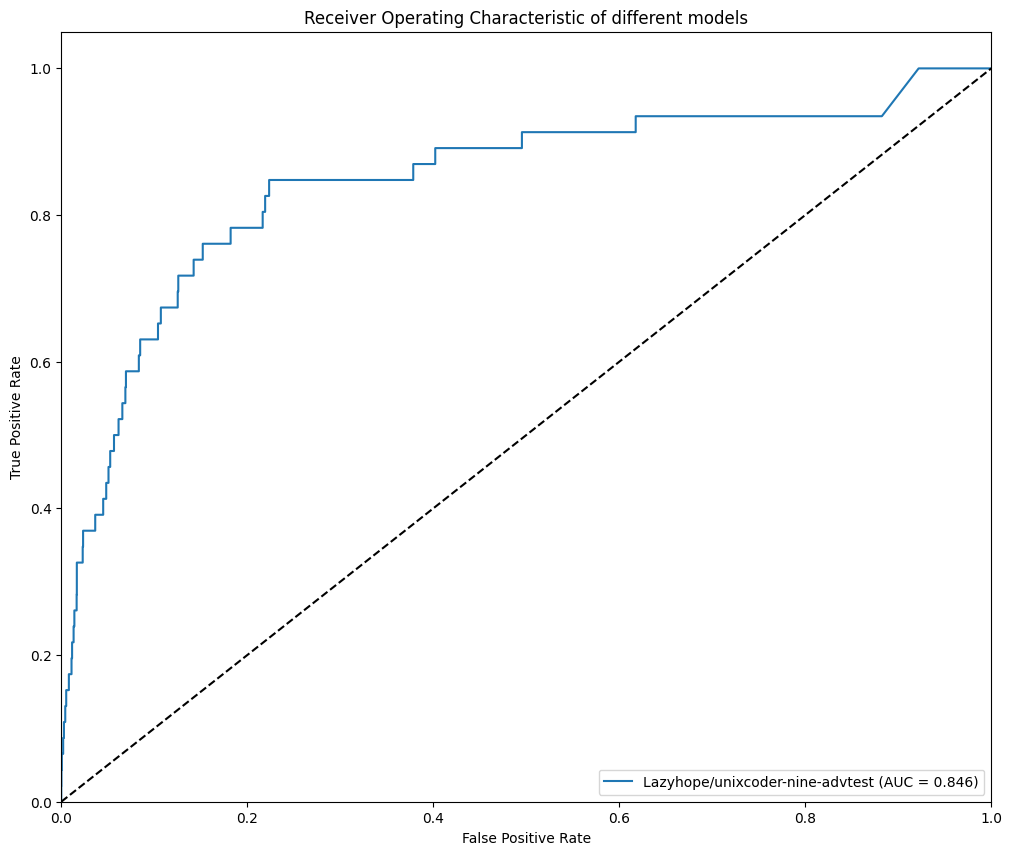

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))


def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc
    plt.plot(fpr, tpr, label=model_name)


for model in model_names:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_code_evaluation_validation_315.png')
plt.show()

In [17]:
model_auc

{'Lazyhope/unixcoder-nine-advtest': 0.8458356975672033}